In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import seaborn
import pandas as pd
import pickle
%matplotlib inline

In [8]:
numFlights = pickle.load(open('numFlights.pickle', 'r'))
numConflicts = pickle.load(open('numConflicts.pickle', 'r'))
totaldelays = pickle.load(open('totaldelays.pickle', 'r'))
dmaxmin = pickle.load(open('dmaxmin.pickle', 'r'))
tdc_min = pickle.load(open('dmaxmin.pickle', 'r'))

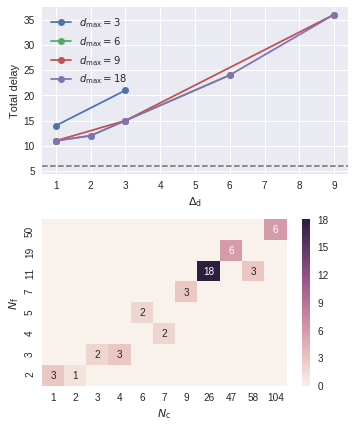

In [9]:
import seaborn
pdf = matplotlib.backends.backend_pdf.PdfPages('delay_only_cp_results.pdf');
fig = plt.figure(figsize=(5, 6));

partition = 44
maxDelay = 18

ax = fig.add_subplot(2, 1, 1)



ax = fig.add_subplot(2, 1, 1)
td = totaldelays[partition]
for maxDelay in sorted(td.keys()):
    ax.plot(maxDelay/np.array(td[maxDelay][0], dtype=float), td[maxDelay][1], 'o-', label='$d_\mathrm{max} = %i$' % maxDelay)
ax.axhline(y=tdc_min[partition], linestyle='--', color='gray')
ax.grid(axis='x')
ax.set_xlabel('$\Delta_\mathrm{d}$')
ax.set_ylabel('Total delay')
ax.grid(True)
ax.legend()

dmm  = [dmaxmin[p] for p in sorted(totaldelays.keys())]
Nf = [numFlights[p] for p in sorted(totaldelays.keys())]
Nc = [numConflicts[p] for p in sorted(totaldelays.keys())]


ax = fig.add_subplot(2, 1, 2)
data = {}
for nf, nc, d in zip(Nf, Nc, dmm):
    data[(nf, nc)] = d
series = pd.Series(list(data.values()), index=pd.MultiIndex.from_tuples(data.keys()))

df = series.unstack().fillna(0)
annotation = df.applymap(lambda x: '' if x == 0.0 else "%i" % x).values
seaborn.heatmap(df, annot=annotation, fmt = '', ax=ax)

#ax.set_title('$d^0_{max}$')
ax.grid(axis='x')
ax.set_xlabel('$N_\mathrm{c}$')
ax.set_ylabel('$N_\mathrm{f}$');
ax.invert_yaxis()

plt.tight_layout()

pdf.savefig(figure=fig);
pdf.close();
plt.tight_layout()